## How often are flights delay?

### Flights delayed which are arriving to LAX.

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# Open and read files
flight_delay_dest = pd.read_csv("../clean/LAX_Dest_Flight_Delays_2016.csv")
# retrive and conver in to dataframe
flight_delay_dest = pd.DataFrame(flight_delay_dest)
flight_delay_dest.head(10)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,Carrier,TailNum,FlightNum,...,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,CarrierName
0,2016,1,1,1,5,2016-01-01,AA,AA,N850AA,58,...,264.0,1.0,2504.0,11,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
1,2016,1,1,2,6,2016-01-02,AA,AA,N855AA,58,...,281.0,1.0,2504.0,11,0.0,0.0,0.0,24.0,8.0,American Airlines Inc.
2,2016,1,1,3,7,2016-01-03,AA,AA,N864AA,58,...,262.0,1.0,2504.0,11,30.0,0.0,0.0,0.0,6.0,American Airlines Inc.
3,2016,1,1,4,1,2016-01-04,AA,AA,N862AA,58,...,261.0,1.0,2504.0,11,1272.0,0.0,11.0,0.0,15.0,American Airlines Inc.
4,2016,1,1,5,2,2016-01-05,AA,AA,N859AA,58,...,251.0,1.0,2504.0,11,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
5,2016,1,1,6,3,2016-01-06,AA,AA,N865AA,58,...,253.0,1.0,2504.0,11,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
6,2016,1,1,7,4,2016-01-07,AA,AA,N861AA,58,...,287.0,1.0,2504.0,11,0.0,0.0,60.0,0.0,0.0,American Airlines Inc.
7,2016,1,1,8,5,2016-01-08,AA,AA,N857AA,58,...,281.0,1.0,2504.0,11,8.0,0.0,42.0,0.0,48.0,American Airlines Inc.
8,2016,1,1,9,6,2016-01-09,AA,AA,N863AA,58,...,284.0,1.0,2504.0,11,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
9,2016,1,1,10,7,2016-01-10,AA,AA,N850AA,58,...,271.0,1.0,2504.0,11,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.


In [4]:
# Total departure delayed by carrier in each month
table_depdelay_carrier = pd.pivot_table(flight_delay_dest, values='DepDel15', columns='CarrierName', index='Month', aggfunc=np.sum)   
table_depdelay_carrier

CarrierName,Alaska Airlines Inc.,American Airlines Inc.,Delta Air Lines Inc.,Frontier Airlines Inc.,Hawaiian Airlines Inc.,JetBlue Airways,SkyWest Airlines Inc.,Southwest Airlines Co.,Spirit Air Lines,United Air Lines Inc.,Virgin America
Month,,,,,,,,,,,
1,54.0,582.0,452.0,18.0,11.0,79.0,354.0,602.0,154.0,406.0,211.0
2,39.0,409.0,297.0,11.0,11.0,82.0,273.0,377.0,186.0,253.0,138.0
3,45.0,581.0,396.0,22.0,11.0,55.0,315.0,767.0,193.0,423.0,225.0
4,42.0,479.0,369.0,26.0,5.0,61.0,181.0,738.0,181.0,348.0,211.0
5,38.0,543.0,364.0,39.0,11.0,75.0,217.0,771.0,202.0,433.0,212.0
6,94.0,1004.0,582.0,49.0,18.0,75.0,368.0,1123.0,244.0,575.0,251.0
7,101.0,1081.0,638.0,71.0,24.0,148.0,355.0,1117.0,202.0,687.0,237.0
8,79.0,962.0,710.0,57.0,16.0,108.0,343.0,818.0,212.0,662.0,221.0
9,43.0,559.0,310.0,39.0,12.0,84.0,257.0,635.0,106.0,398.0,175.0


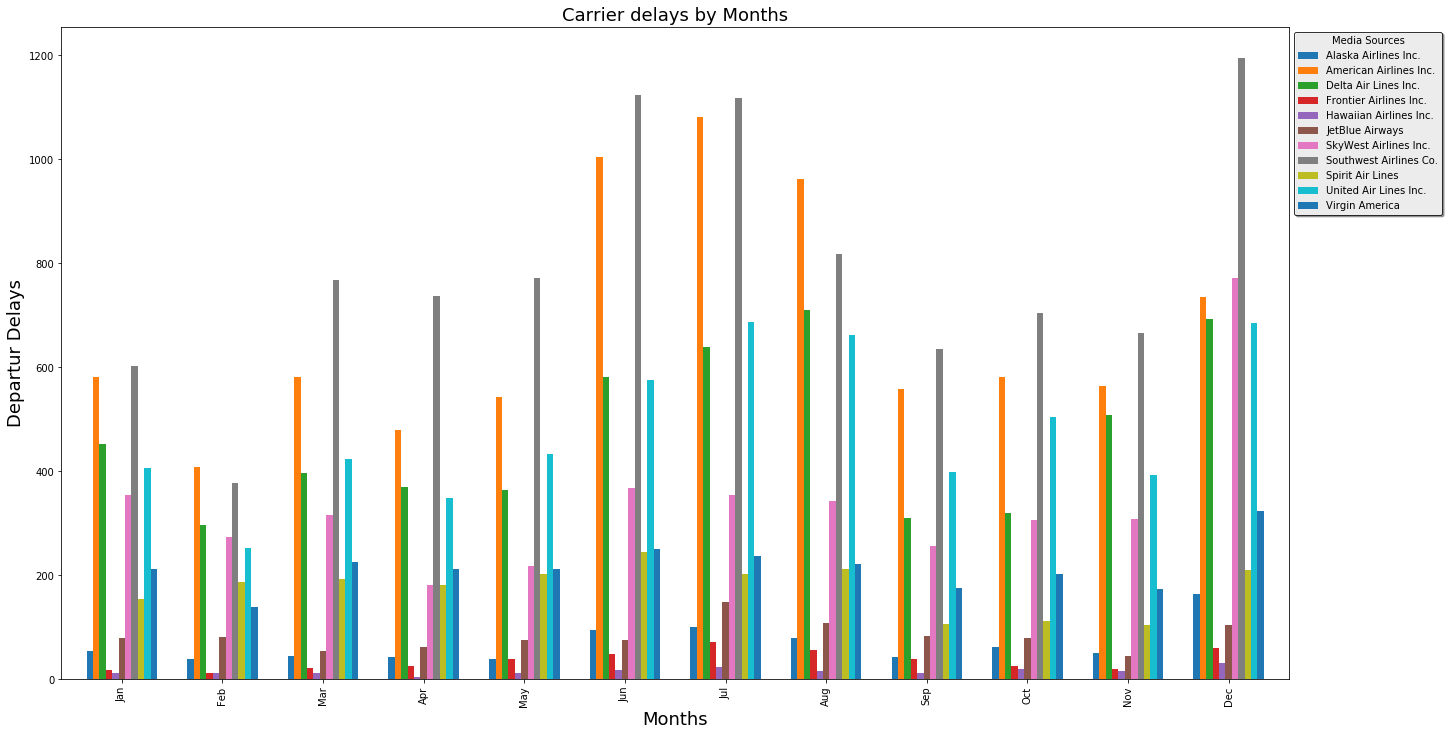

In [5]:
# Plotting total departure delayed by carrier in each month

table_depdelay_carrier.plot(kind='bar',figsize=(22,12), width=0.7)
plt.legend(frameon=True,shadow= True,edgecolor='black',fontsize = 'medium', title='Media Sources', bbox_to_anchor=(1, 1))
plt.xlabel('Months',fontsize='18')
plt.ylabel('Departur Delays',fontsize='18')
plt.title('Carrier delays by Months',fontsize='18')
plt.xticks(np.arange(len(table_depdelay_carrier.index)),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
#plt.savefig('DestFlights_Departure carrier delays by months')
plt.show()


In [6]:
# Total arrival delayed by carrier in each month
table_arrdelay_carrier = pd.pivot_table(flight_delay_dest, values='ArrDel15', index='Month', columns='CarrierName', aggfunc=np.sum)   

table_arrdelay_carrier

CarrierName,Alaska Airlines Inc.,American Airlines Inc.,Delta Air Lines Inc.,Frontier Airlines Inc.,Hawaiian Airlines Inc.,JetBlue Airways,SkyWest Airlines Inc.,Southwest Airlines Co.,Spirit Air Lines,United Air Lines Inc.,Virgin America
Month,,,,,,,,,,,
1,101.0,611.0,577.0,18.0,3.0,66.0,444.0,692.0,164.0,274.0,182.0
2,75.0,450.0,360.0,9.0,10.0,81.0,328.0,402.0,190.0,169.0,120.0
3,75.0,692.0,466.0,23.0,7.0,64.0,455.0,918.0,197.0,459.0,229.0
4,55.0,633.0,360.0,23.0,14.0,46.0,223.0,926.0,186.0,305.0,206.0
5,72.0,654.0,479.0,37.0,10.0,63.0,281.0,995.0,211.0,460.0,235.0
6,169.0,1397.0,751.0,50.0,52.0,85.0,498.0,1354.0,249.0,658.0,367.0
7,110.0,1252.0,699.0,75.0,53.0,172.0,428.0,1307.0,213.0,751.0,334.0
8,79.0,1161.0,786.0,53.0,30.0,125.0,451.0,1107.0,217.0,803.0,316.0
9,60.0,527.0,439.0,42.0,21.0,78.0,372.0,887.0,104.0,595.0,221.0


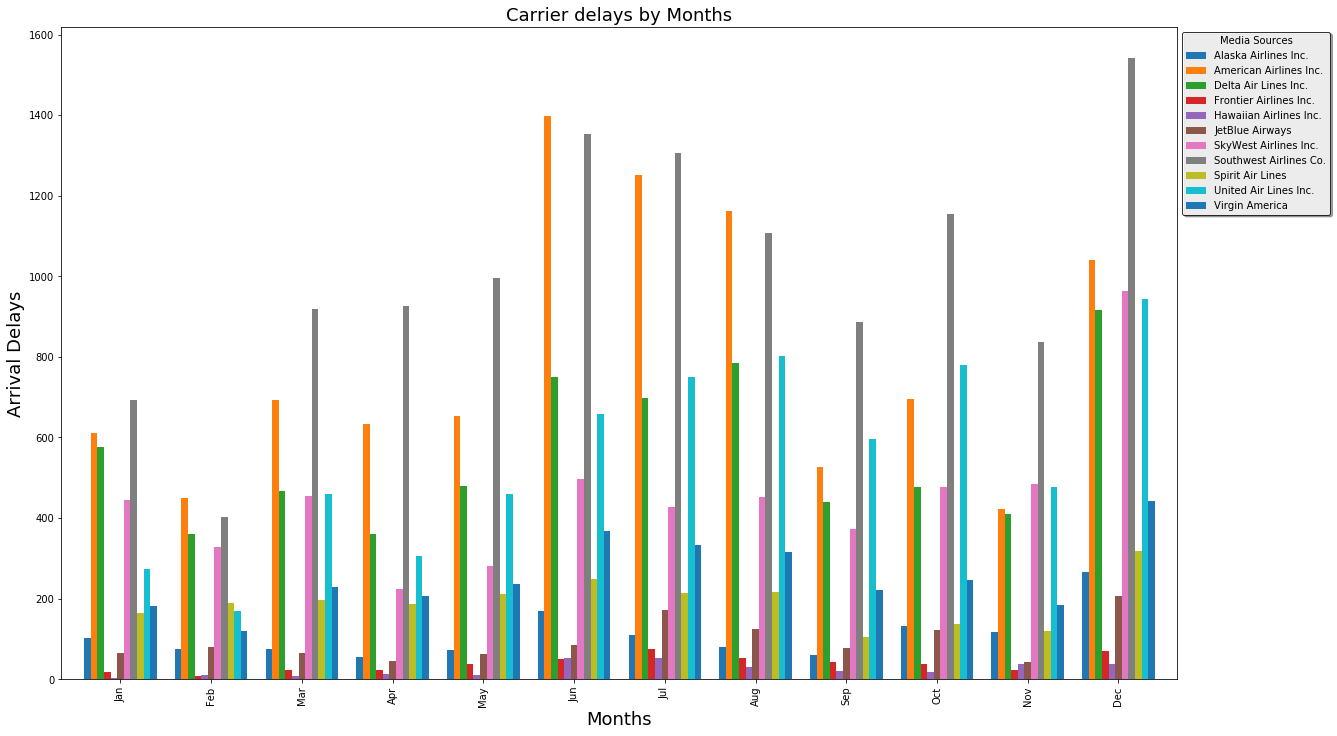

In [7]:
# Plotting total arrival delayed by carrier in each month

table_arrdelay_carrier.plot(kind='bar',figsize=(20,12), width=0.8)
plt.legend(frameon=True,shadow= True,edgecolor='black',fontsize = 'medium', title='Media Sources', bbox_to_anchor=(1, 1))
plt.xlabel('Months',fontsize='18')
plt.ylabel('Arrival Delays',fontsize='18')
plt.title('Carrier delays by Months',fontsize='18')
plt.xticks(np.arange(len(table_arrdelay_carrier.index)),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
#plt.savefig('DestFlights_Arrival carrier delays by months')
plt.show()

In [8]:

td = flight_delay_dest['CarrierName'].value_counts()
td = pd.DataFrame(td)
td = td.rename(columns={'CarrierName':'Total_Flights'})
td = td.sort_index()
td = td.reset_index()
td = td.rename(columns={'index':'CarrierName'})


dd = table_depdelay_carrier.sum()
dd = pd.DataFrame(dd)
dd = dd.rename(columns={0:'Departure_Delayed_Flights'})
dd = dd.reset_index()
dd = pd.DataFrame(dd)



ad = table_arrdelay_carrier.sum()
ad = pd.DataFrame(ad)
ad = ad.rename(columns={0:'Arrival_Delayed_Flights'})
ad = ad.reset_index()
ad = pd.DataFrame(ad)


In [9]:
# Total arrival delays, departure delays and total flights
del_table_total = pd.merge(dd,td)
del_table_total = pd.merge(del_table_total,ad)
del_table_total

,CarrierName,Departure_Delayed_Flights,Total_Flights,Arrival_Delayed_Flights
0,Alaska Airlines Inc.,812.0,8757,1314.0
1,American Airlines Inc.,8079.0,40970,9535.0
2,Delta Air Lines Inc.,5639.0,35488,6719.0
3,Frontier Airlines Inc.,438.0,1713,461.0
4,Hawaiian Airlines Inc.,185.0,1765,292.0
5,JetBlue Airways,996.0,5106,1151.0
6,SkyWest Airlines Inc.,4050.0,24753,5405.0
7,Southwest Airlines Co.,9513.0,41298,12121.0
8,Spirit Air Lines,2107.0,8703,2306.0
9,United Air Lines Inc.,5768.0,28230,6677.0


In [10]:
# Total departure delays in 2016
del_table_total.Departure_Delayed_Flights.sum()


40168.0

In [11]:
# Total arrival delays in 2016
del_table_total.Arrival_Delayed_Flights.sum()

49065.0

In [12]:
# total flights 
del_table_total.Total_Flights.sum()

210706

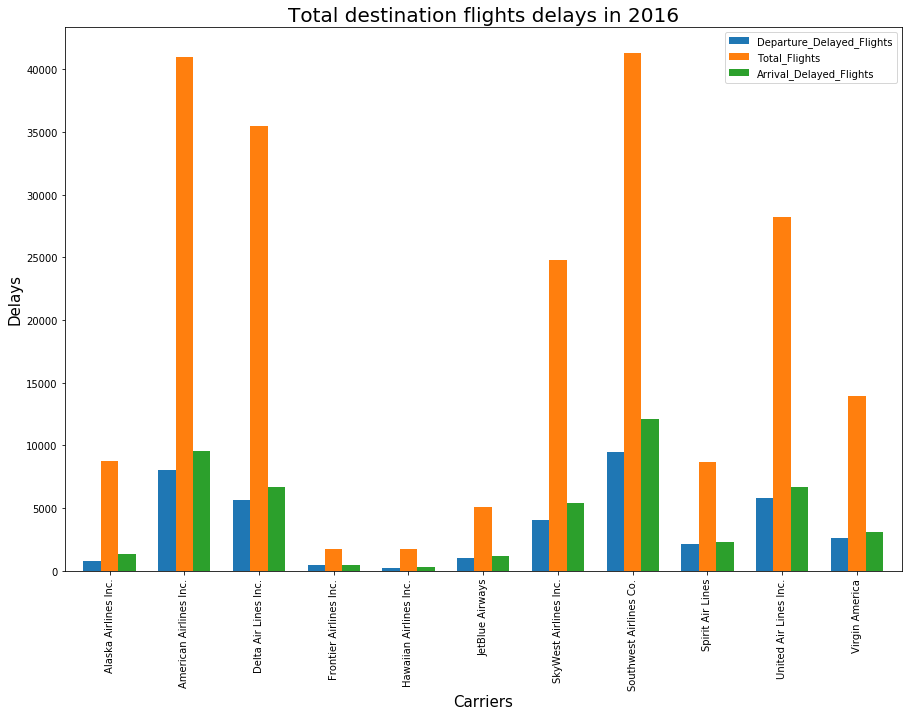

In [13]:
#Plotting total flights, arrival delays and departure delays of 2016
del_table_total.plot(kind='bar',figsize=(15,10), width=0.7, align='center')
plt.xticks(np.arange(len(del_table_total.CarrierName)),('Alaska Airlines Inc.', 'American Airlines Inc.',
       'Delta Air Lines Inc.', 'Frontier Airlines Inc.',
       'Hawaiian Airlines Inc.', 'JetBlue Airways', 'SkyWest Airlines Inc.',
       'Southwest Airlines Co.', 'Spirit Air Lines', 'United Air Lines Inc.',
       'Virgin America'))
plt.xlabel('Carriers', fontsize=15)
plt.ylabel('Delays', fontsize=15)
plt.title('Total destination flights delays in 2016',fontsize=20)
plt.savefig("Destination flights delayed in 2016")
plt.show()
